# Mathematics Review - Probability and Information Theory

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
%matplotlib inline

## Random variables
A **random variable** is a variable that can take on different values randomly. These may be discrete (with a finite number of possible states) or continuous (with an infinite number).

## Probability Distributions
A **probability distribution** is a description of how likely a random variable or set of random variables is to take  on each of its possible states. 

### Discrete Variables and Probability Mass Functions
If a variable is discrete, its probability distribution is described as a probability mass function. A **probability mass function** (PMF) maps the state of a random variable to its probability of taking on that state. A **joint probability distribution** is a PMF acting on multiple variables at once (i.e. $ P(X=x,Y=y).$).

Some properties of PMFs:

* The domain of P is the set of all possible states of X
* $0 \leq P(X) \leq 1$. An impossible event has probability 0, a certain one has probability 1.
* $\sum_{x\in X} P(x) = 1$. The probabilities are normalized so that they sum to 1. 

In [2]:
#in NumPy/SciPy:
X = np.random.choice(5, 10) #create some discrete data
val, count = np.unique(X, return_counts=True) # get value and value counts
pmf = count / float(len(X)) #normalize values to sum to 1
np.column_stack((val, pmf))

array([[ 0. ,  0.2],
       [ 1. ,  0.4],
       [ 2. ,  0.3],
       [ 3. ,  0.1]])

### Continuous Variables and Probability Density Functions
Continuous variables work similar to discrete ones, where the **probability density function** is the continous equivalent of the discrete probability mass function. The key difference is that we must measure probability over intervals in this case because the function is continuous. Accordintly, we instad measure 

$$\int_{a}^{b} p(x)dx.$$

Some properties of PDFs:

* $\int p(x)dx$ = 1. Similar to PMFs, the area covered by the function sums to one. 
* $p(x) \geq 0$
* the domain of the function is all possible states of x

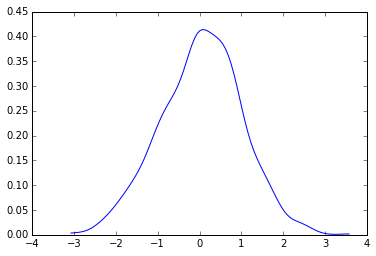

In [3]:
from scipy.stats.kde import gaussian_kde
data = np.random.randn(1000)
kde = gaussian_kde( data )
dist_space = np.linspace( min(data), max(data), 100 )
plt.plot( dist_space, kde(dist_space) )

## Marginal Probability
The **marginal probability distribution** is the distribution over a subset of the variables in a PDF. If $P(x,y)$ is known, we can find $P(x)$ using either a sum rule or an integral, depending on whether the data is discrete or continuous:

$$P(X=x) = \sum_{y} P(X=x,Y=y) $$

$$p(x) = \int p(x,y)dy. $$

## Contidional Probability
We will often be interested in the probability of an event happening conditional on a series of other features. This is computed as:

$$P(Y=y | X=x) = \frac{P(Y=y, X=x)}{P(X=x)}$$

### The Chain Rule of Conditional Probabilities 
A joint probability distribution can be decomposed into conditional distributions over one variable.

$$P(x^{1}, . . ., x^{n}) = P(x^{1})\prod_{i=2}^{n} P(x^{i} | x^{1}, . . ., x^{i-1}). $$

So, for example:

$$ P(a,b,c) = P(a|b,c)P(b,c) $$
$$ P(b,c) = P(b|c)P(c) $$
$$ P(a,b,c) = P(a|b,c)P(b|c)P(c) $$

## Independence and Conditional Independence
Two random variables are **independent** if  their probability distributions can be expressed as a product of one another $$ P(X,Y) = P(X)P(Y). $$

Similarly, they are **conditionally independent** given a third variable $z$ if

$$ P(X,Y|Z) = P(X|Z)P(Y|Z). $$

## Expectation, Variance, and Covariance
The **exptectation** of a function $f(x)$ is the mean value it takes on when drawn from its probability distribution $P(X).$ If discrete, it is calculated as
 $$E[f(X)] = \sum_{x} P(x)f(x) $$
 
 and if coontinuous:
 
 $$ E[f(X)] = \int p(x)f(x)dx. $$
 
 Expectations are linear, so $E[\alpha f(x)] = \alpha E[f(x)].$
 
 **Variance** is a measure of how much a functions values vary when samples from its distribution. 
 
 $$Var(f(x)) = E[(f(x) - E[f(x)])^2] $$
 
 **Covariance** is how much two variables move together in a linear fashion. 
 
 $$ Cov(f(x), g(y)) = E[ (f(x) - E[f(x)]) (g(y) - E[g(y)]) ]. $$
 
 A **covariance matrix**, finally, is a matrix whose elements are the covariances between features. The diagonal elements of this matrix are therefore the variances of features i through j. 

## Common Distributions

### Bernoulli Distribution
This distribution is over a single binary random variable. It is parameterized only by $\theta \in [0,1]$, which gives the probability of the random variable being equal to one.

Properties:

* $P(x=1) = \theta$
* $P(x=0) = 1 - \theta$
* $P(X=x) = \theta ^{x} (1- \theta)^{1-x}$
* $E[X] = \theta$
* $Var(X) = \theta (1 - \theta)$

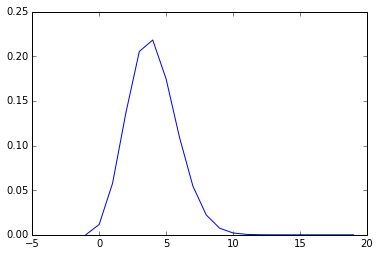

In [4]:
x = np.arange(-1, 20)
dist = sp.binom(20, .2)
plt.plot(x, dist.pmf(x))

### Multinoulli Distribution
The multinoulli, or categorical distibution, is over a single discrete variable with $k$ different states, where $k$ is finite. It is parameterized by $\textbf{p} \in [0,1]^{k-1}$, where $p_{i}$ gives the probability of that $i$-th state.

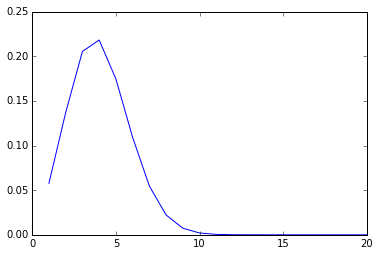

In [5]:
x = np.linspace(1, 20, 20)
dist = sp.binom(20, .2)
plt.plot(x, dist.pmf(x))

### Gaussian Distribution
The gaussian, or **normal distribution**, is parameterized by its mean $\mu$ and variance $\sigma^{2}$. It has convenient properties, such as that the sum of many independnet random variables is approximately normal (see [**central limit theorem**](https://en.wikipedia.org/wiki/Central_limit_theorem)), and that adding observations to your data causes the distribution to collapse around its mean (see [**law of large numbers**](https://en.wikipedia.org/wiki/Law_of_large_numbers)). Also conveniently, many real-world variables are close to being normally distributed. The distribution is defined as:

$$f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\sigma ^{2}\pi }}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}.$$

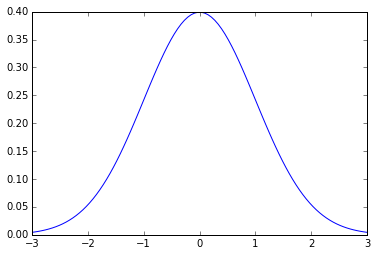

In [6]:
import matplotlib.mlab as mlab
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(-3, 3, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

plt.show()

## Useful Properties of Common Functions

There are a few functions that you can's escape when working with neural network models. Perhaps the most common is the **logistic sigmoid**:

$$ \sigma(x) = \frac{1}{1+\text{exp}(-x)} $$

This function is commonly used to produce the $\theta$ parameter  of a Bernnoulli distribution because its range is (0,1). The sigmoid function saturates when x gets very large or very small, as can be seen in the graph below. 

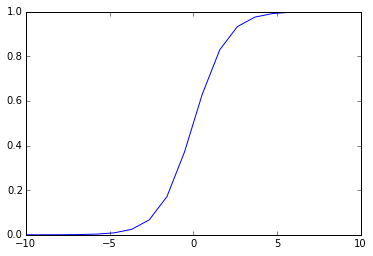

In [7]:
x = np.linspace(-10, 10, 20)
y = 1/(1+np.exp(-x))
plt.plot(x,y)

A second inescapable function is the **softplus function**:

$$ \zeta(x) = \text{log}(1+\text{exp}(x)). $$

This function can be used to create the $\beta$ or $\sigma$ parameter of a normal distribute because its range is $(0,\infty).$ it is also used to manipulate sigmoids. The name "softplus" comes from the fact that it is a smoothed version of the function $f(x) = \text{max}(0, x).$

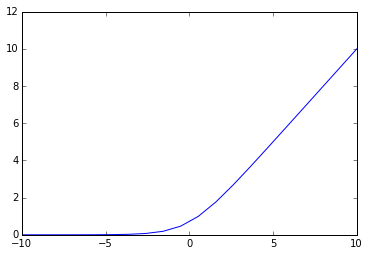

In [8]:
y = np.log(1+np.exp(x))
plt.plot(x,y)

The following properties are important to the point that Goodfellow et al. recommend their reader memorize them:

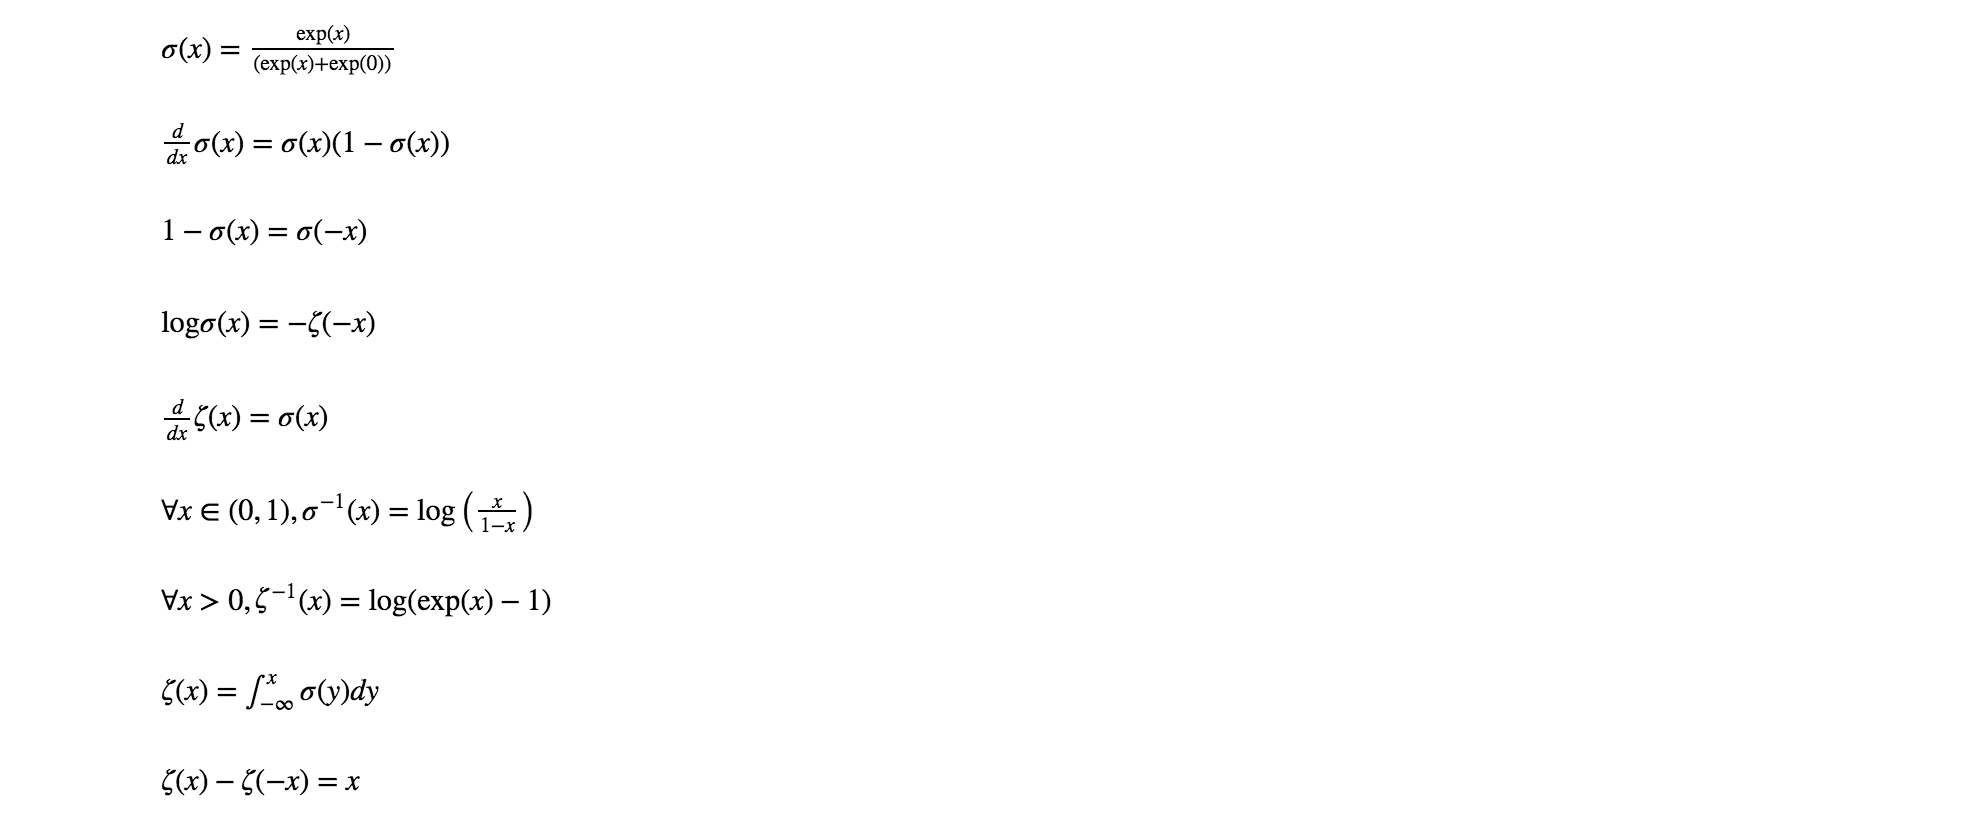

In [6]:
from IPython.display import Image
Image(filename='/Users/jamesledoux/Desktop/tex.png')

## Bayes' Rule

Bayes' rule is a way to find $p(x|y)$ when we already know $p(y|x)$ and $ p(x).$ The rule states that:

$$ p(x|y) = \frac{p(y|x)p(x)}{p(y)}$$

## Information Theory

Information theory is a branch of applied mathematics that revolves aroiund quantifying how much informatin is present in a signal.

The basic intuition of information theory is that unikely events provide more useful information than likely events. To formalize this intuition:

* likely events should have low information content, and guaranteed events should have zero information content
* unlikely events should high information content
* independent events should have additive information. The results of two coin flips provide more information than the result of only one. 

**Self-information** of an event x in this field is defined as:

$$ I(x) = -\text{log}P(x)$$

**Shannon entropy** refers to the expectation of this function:

$$ H(x) = E_{x \tilde{} P}\left[ I(x) \right] = -E_{x \tilde{} P}\left[ \text{log}P(x) \right]
 $$

When x is continuous, this is referred to as **differential entropy**. When an outcome is almost certain, entropy is low, and visa-versa when an event is unlikely. 

Further, we can measure how different two probability distributions $P(x)$ and $Q(x)$ are over the same variable using **Kullback-Liebler (KL) Divergence**:

$$ D_{KL}(P||Q) = E_{x \tilde{} P}\left[ \text{log}\frac{P(x)}{Q(x)} \right] = E_{x \tilde{} P} \left[ \text{log}P(x) - \text{log}Q(x) \right]$$

A convenient property of this is that it is non-negative, and equals 0 if and only if P(x) and Q(x) are the same distribution. This sounds like it is measuring the difference between P and Q, but note that $D_{KL}(P||Q) \neq D_{KL}(Q||P)$, meaning that it is not symmetric and not a true distance measure. 

A related measuyre is **cross-entropy**. This measure is similar to KL divergence, but eliminates the term on the left:

$$ H(P,Q) = H(P) + D_{KL}(P||Q) $$
$$ H(P,Q) = -E_{x \tilde{} P} \text{log}Q(x) $$

Minimizing cross entropy with respect to Q is equivalent to minimizing the KL divervence, buecause Q does not participate in the omitted term. 
